[Repo Link](https://github.com/habibaelghazouly/ML-projects.git)

## Imports

In [51]:
import os
import sys
sys.path.append("..")
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

from src import preprocess_mnist
from src import NNModel
from src import train_model_nn
from src import plot_training_curves
from src import detect_convergence, plot_convergence 
from src.NNs.helpers import get_gradients
from src import LogisticRegressionModel
from src import train_model, test_model
from src import plot_curves, print_confusion_matrix
from src import SoftmaxRegressionModel
from src import CNNModel
from src import train_model_cnn
from src import LogisticRegressionScratch
from src import SoftmaxRegressionScratch
from src.Linear_Classification.utils import plot_curves, print_confusion_matrix
import torch

epochs = 10


## Displaying Non-Flattened MNIST Images

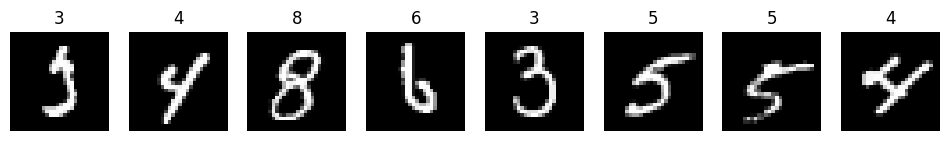

In [52]:
train_loader, val_loader, test_loader = preprocess_mnist(flatten=False)

images, labels = next(iter(train_loader))
fig, axes = plt.subplots(1, 8, figsize=(12, 2))
for i in range(8):
    axes[i].imshow(images[i].squeeze(), cmap='gray')
    axes[i].set_title(str(labels[i].item()))
    axes[i].axis('off')
plt.show()


## Displaying Flattened MNIST Data Information

In [53]:
train_loader, val_loader, test_loader = preprocess_mnist(batch_size=64, augment=False, flatten=True)

images, labels = next(iter(train_loader))
print(f"Images batch shape: {images.shape}")
print(f"Labels batch shape: {labels.shape}")
print(f"Example labels: {labels[:10]}")

Images batch shape: torch.Size([64, 784])
Labels batch shape: torch.Size([64])
Example labels: tensor([0, 2, 9, 0, 7, 0, 7, 9, 9, 2])


In [54]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Binary Classification (0,1)

In [55]:
# Filter 0 and 1 only
def filter_binary(loader):
    X, y = [], []
    for img, label in loader.dataset:
        if label in [0, 1]:
            X.append(img)
            y.append(label)
    X = torch.stack(X)
    y = torch.tensor(y)
    ds = torch.utils.data.TensorDataset(X, y)
    return torch.utils.data.DataLoader(ds, batch_size=64, shuffle=True)

train_loader_bin = filter_binary(train_loader)
val_loader_bin = filter_binary(val_loader)
test_loader_bin = filter_binary(test_loader)

## Logistic Regression Model

In [56]:
model_log = LogisticRegressionModel(input_dim=784)
loss_fn = nn.BCELoss()

## Train

In [57]:

# Training time
start_time = time.time()
train_losses, val_losses, train_accs, val_accs = train_model(
    model_log, train_loader_bin, val_loader_bin,
    epochs=epochs, lr=0.01, device=device, loss_fn=loss_fn, binary=True
)

end_time = time.time()
training_time_logistic = end_time - start_time
print(f"Training time for Logistic Regression Model: {training_time_logistic:.2f} seconds")

Epoch [1/10] Train Loss: 0.2290, Val Loss: 0.1079, Train Acc: 0.9895, Val Acc: 0.9941


Epoch [2/10] Train Loss: 0.0793, Val Loss: 0.0654, Train Acc: 0.9966, Val Acc: 0.9945


Epoch [3/10] Train Loss: 0.0529, Val Loss: 0.0495, Train Acc: 0.9966, Val Acc: 0.9945


Epoch [4/10] Train Loss: 0.0412, Val Loss: 0.0410, Train Acc: 0.9968, Val Acc: 0.9949


Epoch [5/10] Train Loss: 0.0343, Val Loss: 0.0357, Train Acc: 0.9971, Val Acc: 0.9949


Epoch [6/10] Train Loss: 0.0298, Val Loss: 0.0320, Train Acc: 0.9974, Val Acc: 0.9949


Epoch [7/10] Train Loss: 0.0266, Val Loss: 0.0293, Train Acc: 0.9975, Val Acc: 0.9949


Epoch [8/10] Train Loss: 0.0242, Val Loss: 0.0272, Train Acc: 0.9975, Val Acc: 0.9949


Epoch [9/10] Train Loss: 0.0223, Val Loss: 0.0255, Train Acc: 0.9976, Val Acc: 0.9949


Epoch [10/10] Train Loss: 0.0207, Val Loss: 0.0241, Train Acc: 0.9980, Val Acc: 0.9949
Training time for Logistic Regression Model: 1.40 seconds


## Plots


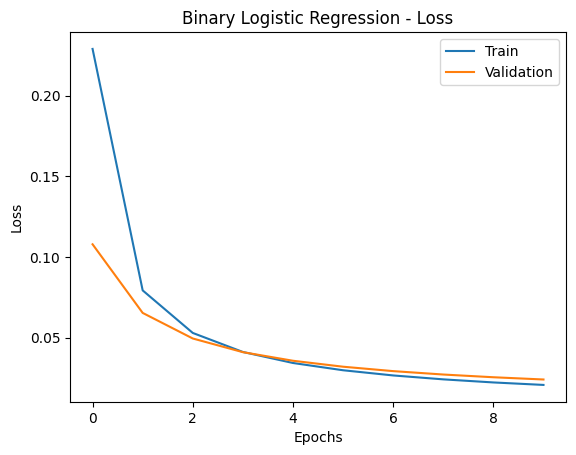

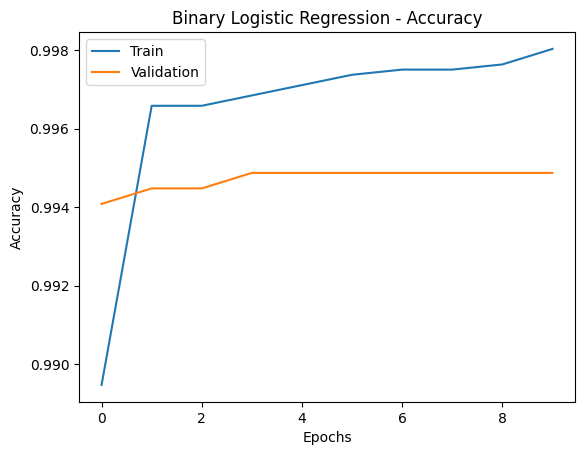

In [58]:
plot_curves(train_losses, val_losses, "Binary Logistic Regression - Loss", "Loss")
plot_curves(train_accs, val_accs, "Binary Logistic Regression - Accuracy", "Accuracy")

## Test

Test Accuracy: 99.842%


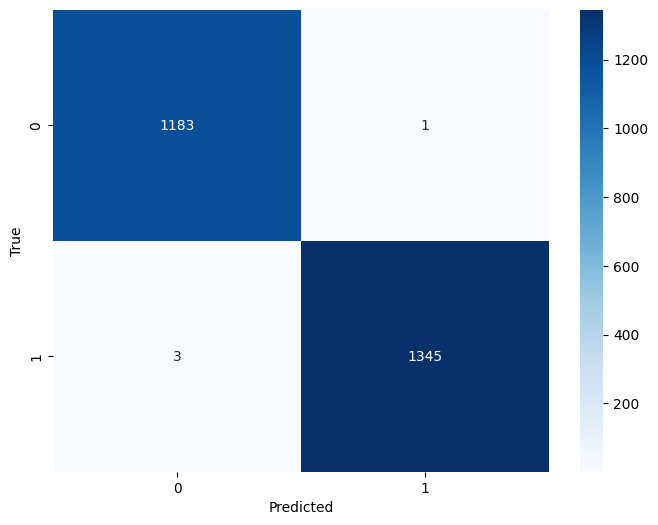

In [59]:
acc_logistic, cm = test_model(model_log, test_loader_bin, device, binary=True)
print(f"Test Accuracy: {acc_logistic*100:.3f}%")
print_confusion_matrix(cm, classes=["0", "1"])

## Softmax Regression

In [60]:
# model
model_softmax = SoftmaxRegressionModel(input_dim=784, num_classes=10)
loss_fn = nn.CrossEntropyLoss()

In [61]:
# training time
start_time = time.time()
train_loader, val_loader, test_loader = preprocess_mnist(flatten=True)

train_losses, val_losses, train_accs, val_accs = train_model(
    model_softmax, train_loader, val_loader,
    epochs=epochs, lr=0.01, device=device, loss_fn=loss_fn
)

end_time = time.time()
training_time_softmax = end_time - start_time
print(f"Training time for Softmax Model: {training_time_softmax:.2f} seconds")

Epoch [1/10] Train Loss: 1.1808, Val Loss: 0.7738, Train Acc: 0.7634, Val Acc: 0.8356


Epoch [2/10] Train Loss: 0.6595, Val Loss: 0.5973, Train Acc: 0.8525, Val Acc: 0.8603


Epoch [3/10] Train Loss: 0.5466, Val Loss: 0.5263, Train Acc: 0.8681, Val Acc: 0.8715


Epoch [4/10] Train Loss: 0.4924, Val Loss: 0.4860, Train Acc: 0.8762, Val Acc: 0.8768


Epoch [5/10] Train Loss: 0.4592, Val Loss: 0.4600, Train Acc: 0.8814, Val Acc: 0.8807


Epoch [6/10] Train Loss: 0.4362, Val Loss: 0.4421, Train Acc: 0.8857, Val Acc: 0.8857


Epoch [7/10] Train Loss: 0.4193, Val Loss: 0.4266, Train Acc: 0.8887, Val Acc: 0.8882


Epoch [8/10] Train Loss: 0.4059, Val Loss: 0.4153, Train Acc: 0.8908, Val Acc: 0.8895


Epoch [9/10] Train Loss: 0.3951, Val Loss: 0.4061, Train Acc: 0.8929, Val Acc: 0.8914


Epoch [10/10] Train Loss: 0.3859, Val Loss: 0.3985, Train Acc: 0.8947, Val Acc: 0.8926
Training time for Softmax Model: 43.34 seconds


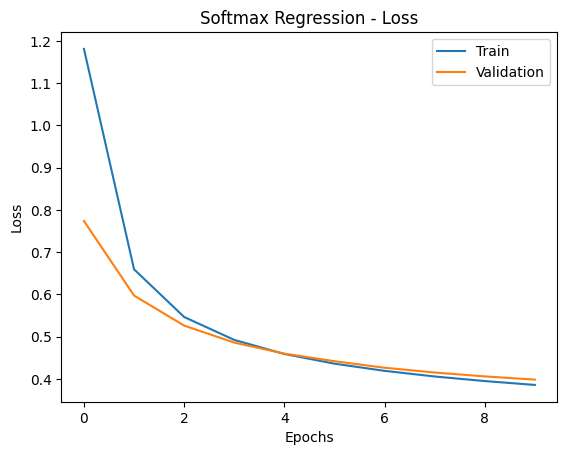

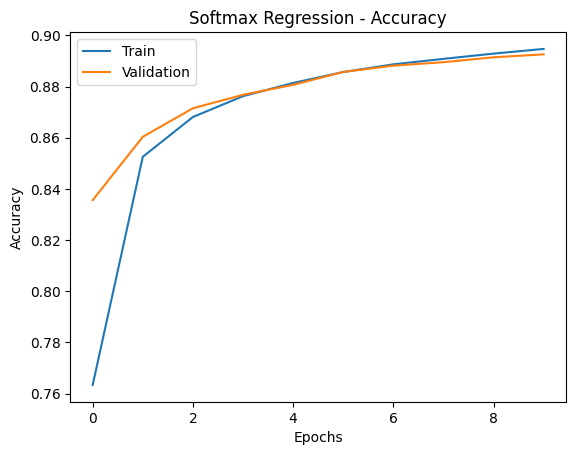

In [62]:
# plot
plot_curves(train_losses, val_losses, "Softmax Regression - Loss", "Loss")
plot_curves(train_accs, val_accs, "Softmax Regression - Accuracy", "Accuracy")

Test Accuracy: 89.275%


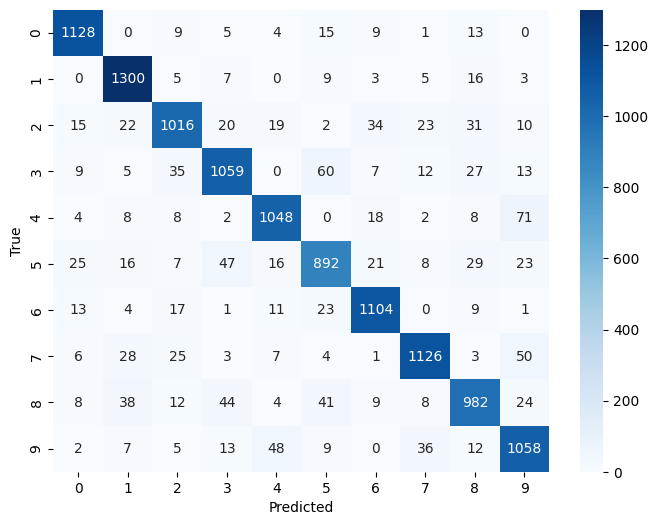

Accuracy of class 0: 95.27%
Accuracy of class 1: 96.44%
Accuracy of class 2: 85.23%
Accuracy of class 3: 86.31%
Accuracy of class 4: 89.65%
Accuracy of class 5: 82.29%
Accuracy of class 6: 93.32%
Accuracy of class 7: 89.86%
Accuracy of class 8: 83.93%
Accuracy of class 9: 88.91%


In [63]:
# test
acc_softmax, cm = test_model(model_softmax, test_loader, device)
print(f"Test Accuracy: {acc_softmax*100:.3f}%")
print_confusion_matrix(cm, classes=[str(i) for i in range(10)])

# per class accuracy
class_correct = [0 for _ in range(10)]
class_total = [0 for _ in range(10)]
model_softmax.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_softmax(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(10):
    if class_total[i] > 0:
        print(f"Accuracy of class {i}: {100 * class_correct[i] / class_total[i]:.2f}%")
    else:
        print(f"Accuracy of class {i}: N/A (no samples)")

# Binary Logistic Regression (From Scratch)

# Model from scratch

In [64]:
log_scratch = LogisticRegressionScratch(input_dim=784, learning_rate=0.01, max_epochs=30)
train_losses_s, val_losses_s, train_accs_s, val_accs_s = log_scratch.fit(train_loader_bin, val_loader_bin)

Epoch [1/30] Train Loss: 1.0380, Val Loss: 1.3399, Train Acc: 0.9920, Val Acc: 0.9949
Epoch [2/30] Train Loss: 1.5107, Val Loss: 1.6720, Train Acc: 0.9967, Val Acc: 0.9949
Epoch [3/30] Train Loss: 1.7659, Val Loss: 1.8751, Train Acc: 0.9970, Val Acc: 0.9949
Epoch [4/30] Train Loss: 1.9567, Val Loss: 2.0315, Train Acc: 0.9971, Val Acc: 0.9953
Epoch [5/30] Train Loss: 2.0894, Val Loss: 2.1544, Train Acc: 0.9972, Val Acc: 0.9953
Epoch [6/30] Train Loss: 2.1962, Val Loss: 2.2591, Train Acc: 0.9976, Val Acc: 0.9953
Epoch [7/30] Train Loss: 2.2884, Val Loss: 2.3283, Train Acc: 0.9976, Val Acc: 0.9953
Epoch [8/30] Train Loss: 2.3770, Val Loss: 2.4253, Train Acc: 0.9979, Val Acc: 0.9953
Epoch [9/30] Train Loss: 2.4482, Val Loss: 2.4724, Train Acc: 0.9979, Val Acc: 0.9953
Epoch [10/30] Train Loss: 2.5031, Val Loss: 2.5398, Train Acc: 0.9979, Val Acc: 0.9953
Epoch [11/30] Train Loss: 2.5810, Val Loss: 2.5897, Train Acc: 0.9979, Val Acc: 0.9953
Epoch [12/30] Train Loss: 2.6257, Val Loss: 2.6518, 

# Plots

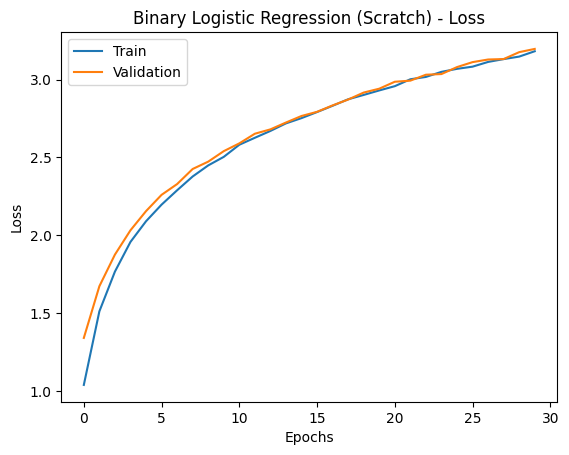

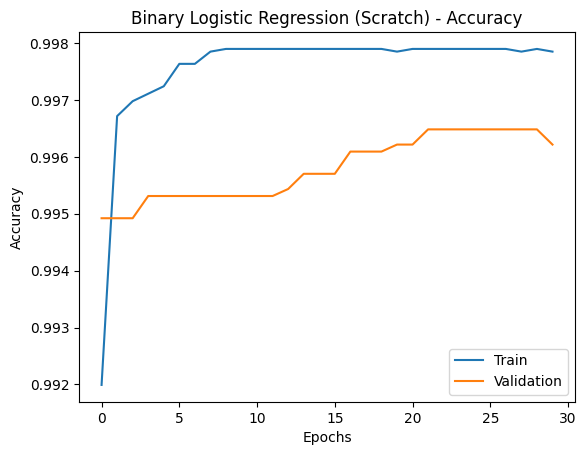

In [65]:
plot_curves(train_losses_s, val_losses_s, "Binary Logistic Regression (Scratch) - Loss", "Loss")
plot_curves(train_accs_s, val_accs_s, "Binary Logistic Regression (Scratch) - Accuracy", "Accuracy")

# Test evaluation

Test Accuracy (Scratch Logistic): 0.9844


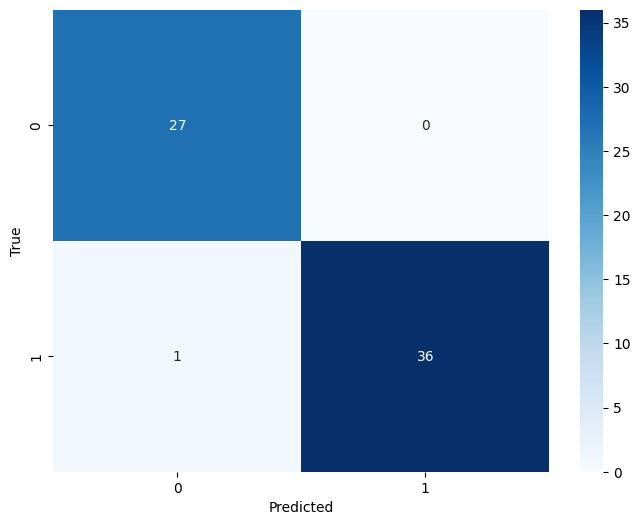

In [66]:
X_test, y_test = next(iter(test_loader_bin))
y_pred = log_scratch.predict(X_test)
acc = (y_pred == y_test).float().mean().item()
print(f"Test Accuracy (Scratch Logistic): {acc:.4f}")
cm = torch.zeros((2,2), dtype=torch.int64)
for t, p in zip(y_test, y_pred):
    cm[t.long(), p.long()] += 1
print_confusion_matrix(cm.numpy(), classes=["0", "1"])

# Softmax Regression (From Scratch)

# Scratch implementation

In [67]:
softmax_scratch = SoftmaxRegressionScratch(input_dim=784, num_classes=10, learning_rate=0.01, max_epochs=30)
train_losses_s, val_losses_s, train_accs_s, val_accs_s = softmax_scratch.fit(train_loader, val_loader)

Epoch [1/30] Train Loss: 1.1709, Val Loss: 0.7673, Train Acc: 0.7979, Val Acc: 0.8407
Epoch [2/30] Train Loss: 0.6554, Val Loss: 0.5942, Train Acc: 0.8554, Val Acc: 0.8615
Epoch [3/30] Train Loss: 0.5446, Val Loss: 0.5241, Train Acc: 0.8690, Val Acc: 0.8708
Epoch [4/30] Train Loss: 0.4909, Val Loss: 0.4845, Train Acc: 0.8772, Val Acc: 0.8787
Epoch [5/30] Train Loss: 0.4579, Val Loss: 0.4588, Train Acc: 0.8817, Val Acc: 0.8832
Epoch [6/30] Train Loss: 0.4353, Val Loss: 0.4401, Train Acc: 0.8854, Val Acc: 0.8856
Epoch [7/30] Train Loss: 0.4185, Val Loss: 0.4257, Train Acc: 0.8881, Val Acc: 0.8874
Epoch [8/30] Train Loss: 0.4051, Val Loss: 0.4141, Train Acc: 0.8910, Val Acc: 0.8901
Epoch [9/30] Train Loss: 0.3945, Val Loss: 0.4049, Train Acc: 0.8936, Val Acc: 0.8911
Epoch [10/30] Train Loss: 0.3856, Val Loss: 0.3972, Train Acc: 0.8951, Val Acc: 0.8935
Epoch [11/30] Train Loss: 0.3779, Val Loss: 0.3904, Train Acc: 0.8970, Val Acc: 0.8947
Epoch [12/30] Train Loss: 0.3712, Val Loss: 0.3847, 

# Plots

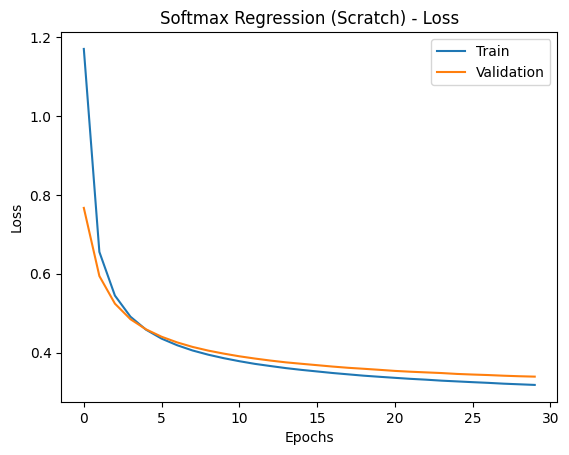

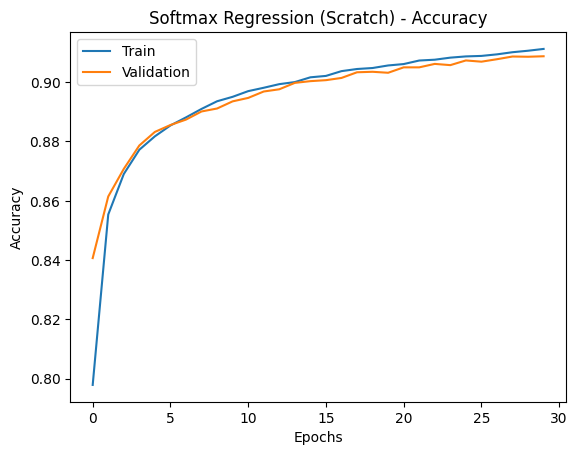

In [68]:
plot_curves(train_losses_s, val_losses_s, "Softmax Regression (Scratch) - Loss", "Loss")
plot_curves(train_accs_s, val_accs_s, "Softmax Regression (Scratch) - Accuracy", "Accuracy")

# Evaluate on test set

In [69]:
X_test, y_test = next(iter(test_loader))
y_pred = softmax_scratch.predict(X_test)
acc = (y_pred == y_test).float().mean().item()
print(f"Test Accuracy (Scratch Softmax): {acc:.4f}")

Test Accuracy (Scratch Softmax): 0.9375


# Confusion Matrix

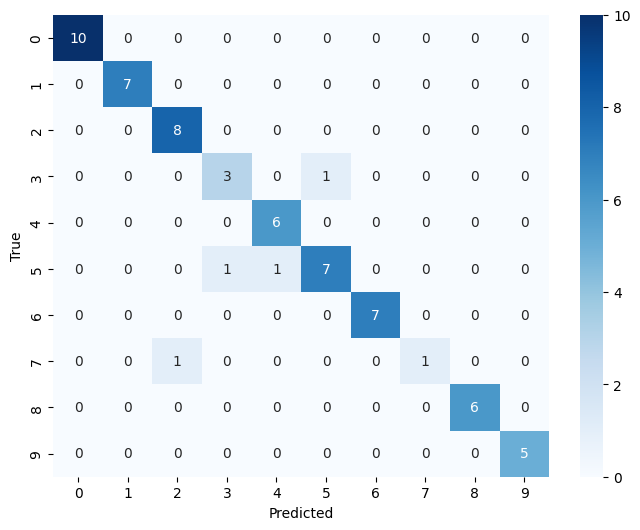

In [70]:
cm = torch.zeros((10,10), dtype=torch.int64)
for t, p in zip(y_test, y_pred):
    cm[t.long(), p.long()] += 1
print_confusion_matrix(cm.numpy(), classes=[str(i) for i in range(10)])

# Compare with PyTorch built-in model (verification)

=== Softmax Regression Comparison ===
Built-in PyTorch Model:
  → Final Validation Accuracy: 89.26%
  → Final Validation Loss: 0.3985
  → Test Accuracy: 89.28%
  → Training Time: 43.34 seconds

From-Scratch Implementation:
  → Final Validation Accuracy: 90.87%
  → Final Validation Loss: 0.3387
  → Test Accuracy: 93.75%
(Training time for scratch model is printed during fitting loop)



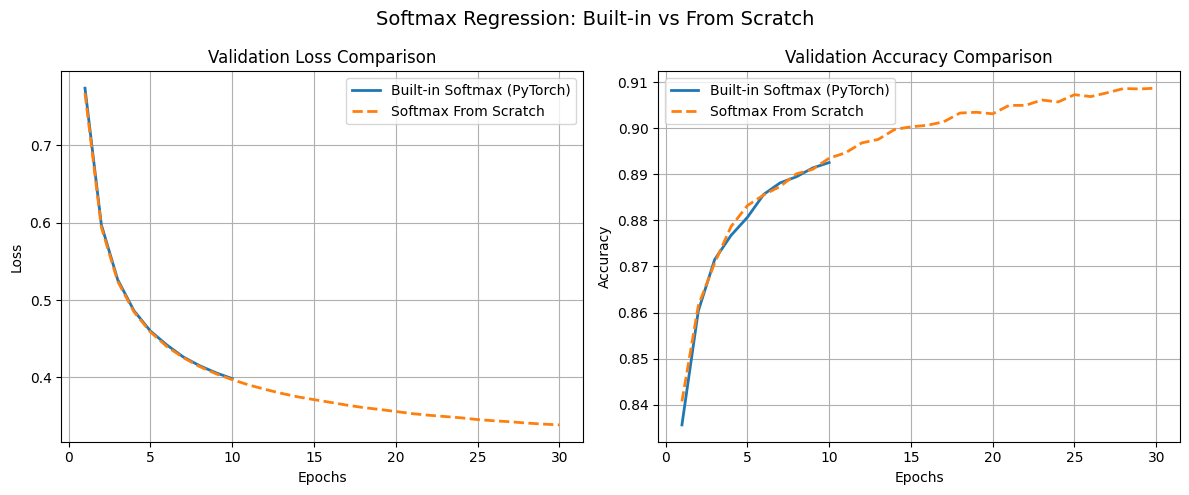

In [71]:
import matplotlib.pyplot as plt

# Compare final metrics
print("=== Softmax Regression Comparison ===")
print(f"Built-in PyTorch Model:")
print(f"  → Final Validation Accuracy: {val_accs[-1]*100:.2f}%")
print(f"  → Final Validation Loss: {val_losses[-1]:.4f}")
print(f"  → Test Accuracy: {acc_softmax*100:.2f}%")
print(f"  → Training Time: {training_time_softmax:.2f} seconds\n")

print(f"From-Scratch Implementation:")
print(f"  → Final Validation Accuracy: {val_accs_s[-1]*100:.2f}%")
print(f"  → Final Validation Loss: {val_losses_s[-1]:.4f}")
print(f"  → Test Accuracy: {acc*100:.2f}%")
print("(Training time for scratch model is printed during fitting loop)\n")

# Handle different epoch lengths (10 vs 30)
epochs_builtin = range(1, len(val_losses) + 1)
epochs_scratch = range(1, len(val_losses_s) + 1)

plt.figure(figsize=(12, 5))

# Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_builtin, val_losses, label='Built-in Softmax (PyTorch)', linewidth=2)
plt.plot(epochs_scratch, val_losses_s, label='Softmax From Scratch', linestyle='--', linewidth=2)
plt.title("Validation Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_builtin, val_accs, label='Built-in Softmax (PyTorch)', linewidth=2)
plt.plot(epochs_scratch, val_accs_s, label='Softmax From Scratch', linestyle='--', linewidth=2)
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.suptitle("Softmax Regression: Built-in vs From Scratch", fontsize=14)
plt.tight_layout()
plt.show()


## Neural Network Model

Epoch 1/10 | Train Loss: 1.0680 | Train Acc: 73.04% | Val Loss: 0.4913 | Val Acc: 86.45%
New best model found (val_loss=0.4913)
Checkpoint saved at: ./checkpoints/mnist.pth
Epoch 2/10 | Train Loss: 0.4030 | Train Acc: 88.77% | Val Loss: 0.3629 | Val Acc: 89.81%
New best model found (val_loss=0.3629)
Checkpoint saved at: ./checkpoints/mnist.pth
Epoch 3/10 | Train Loss: 0.3248 | Train Acc: 90.67% | Val Loss: 0.3212 | Val Acc: 90.88%
New best model found (val_loss=0.3212)
Checkpoint saved at: ./checkpoints/mnist.pth
Epoch 4/10 | Train Loss: 0.2858 | Train Acc: 91.76% | Val Loss: 0.2798 | Val Acc: 92.18%
New best model found (val_loss=0.2798)
Checkpoint saved at: ./checkpoints/mnist.pth
Epoch 5/10 | Train Loss: 0.2575 | Train Acc: 92.65% | Val Loss: 0.2678 | Val Acc: 92.20%
New best model found (val_loss=0.2678)
Checkpoint saved at: ./checkpoints/mnist.pth
Epoch 6/10 | Train Loss: 0.2356 | Train Acc: 93.23% | Val Loss: 0.2468 | Val Acc: 92.98%
New best model found (val_loss=0.2468)
Checkpo

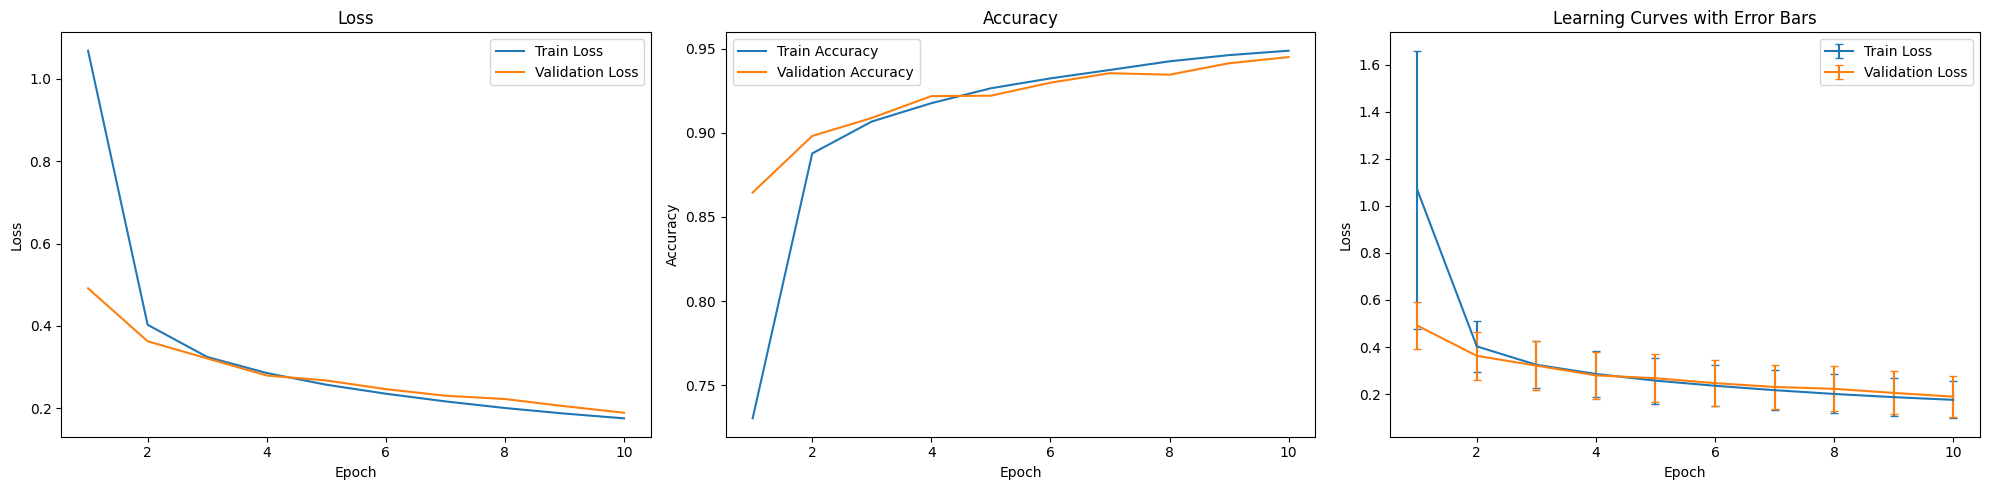

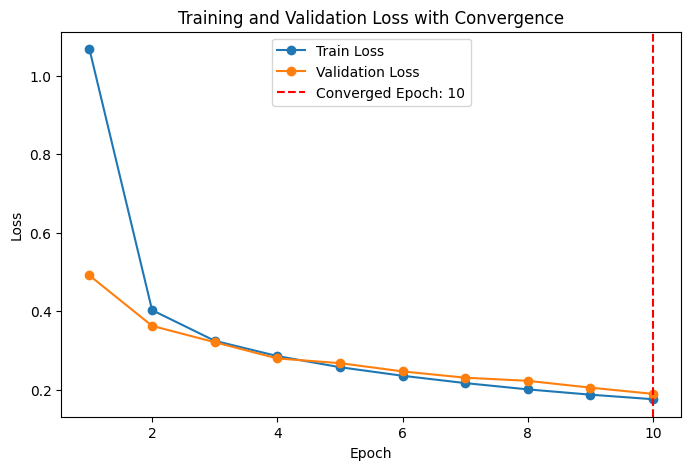

In [72]:
# Model, loss, optimizer
model = NNModel().to(device)
model.apply(model._init_weights)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

##epochs = 10

checkpoint_path = "./checkpoints/mnist.pth"
os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)

train_loader, val_loader, test_loader = preprocess_mnist(batch_size=64, augment=False, flatten=True)

# Train
history = train_model_nn(model, train_loader, val_loader, criterion, optimizer, epochs=epochs, device=device, checkpoint_path=checkpoint_path)

# Plot
plot_training_curves(history)
conv_epoch = detect_convergence(history["val_loss_mean"])
plot_convergence(history["train_loss_mean"], history["val_loss_mean"], conv_epoch)


# Analysis


### 1. Learning Rate Analysis

Training with learning rate: 0.001
Epoch 1/10 | Train Loss: 2.2048 | Train Acc: 24.81% | Val Loss: 2.0745 | Val Acc: 37.04%
New best model found (val_loss=2.0745)
Epoch 2/10 | Train Loss: 1.9197 | Train Acc: 50.61% | Val Loss: 1.7593 | Val Acc: 61.06%
New best model found (val_loss=1.7593)
Epoch 3/10 | Train Loss: 1.5658 | Train Acc: 67.64% | Val Loss: 1.3858 | Val Acc: 71.90%
New best model found (val_loss=1.3858)
Epoch 4/10 | Train Loss: 1.2097 | Train Acc: 74.99% | Val Loss: 1.0673 | Val Acc: 76.58%
New best model found (val_loss=1.0673)
Epoch 5/10 | Train Loss: 0.9418 | Train Acc: 79.31% | Val Loss: 0.8527 | Val Acc: 80.39%
New best model found (val_loss=0.8527)
Epoch 6/10 | Train Loss: 0.7688 | Train Acc: 82.26% | Val Loss: 0.7168 | Val Acc: 83.09%
New best model found (val_loss=0.7168)
Epoch 7/10 | Train Loss: 0.6572 | Train Acc: 84.35% | Val Loss: 0.6274 | Val Acc: 84.67%
New best model found (val_loss=0.6274)
Epoch 8/10 | Train Loss: 0.5821 | Train Acc: 85.57% | Val Loss: 0.565

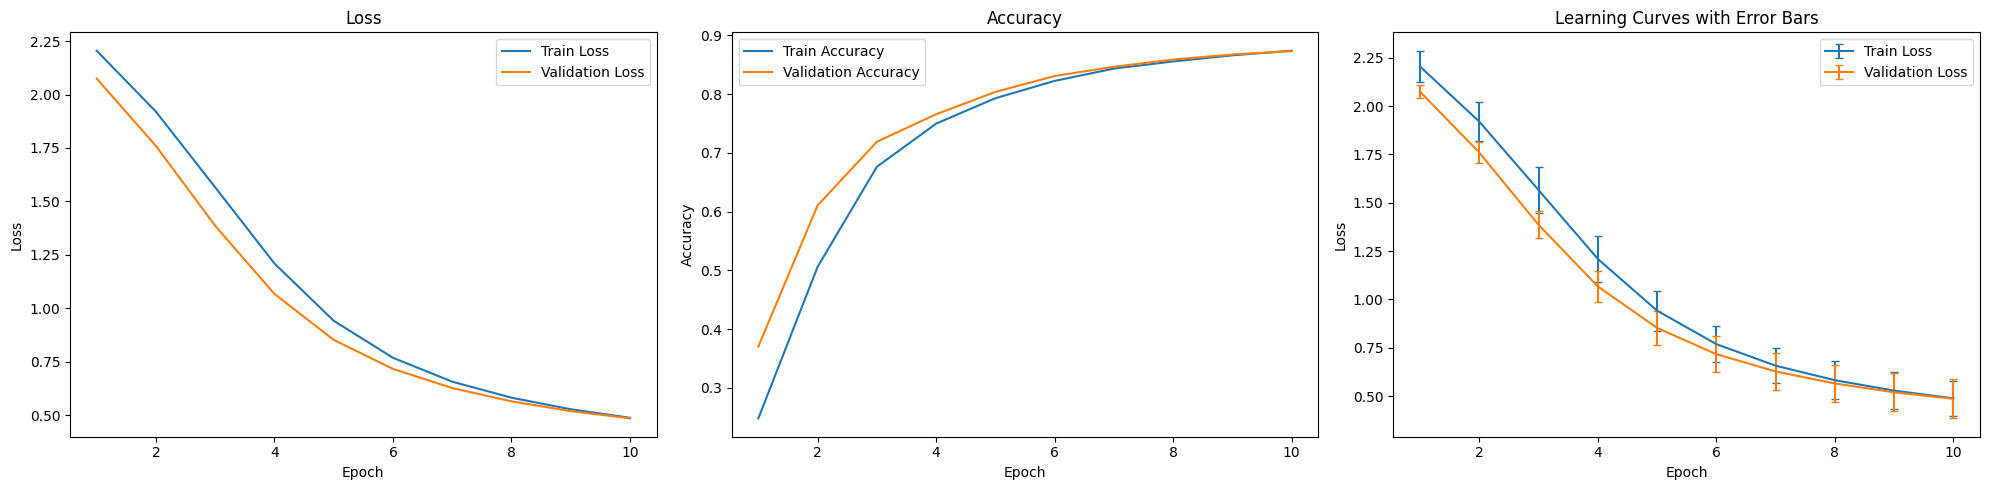

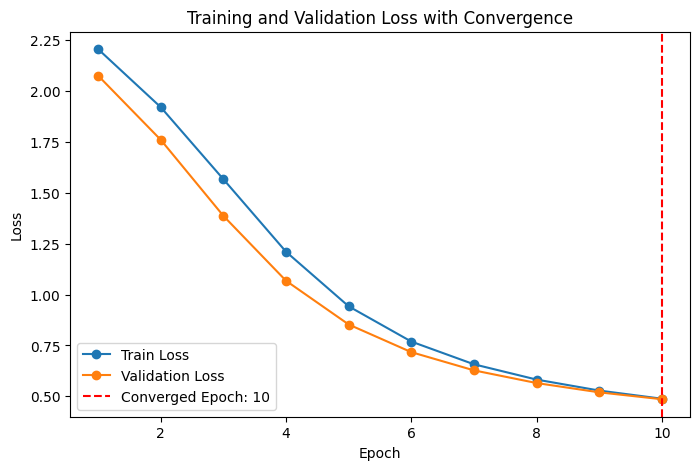

Training with learning rate: 0.01
Epoch 1/10 | Train Loss: 1.1313 | Train Acc: 70.87% | Val Loss: 0.4942 | Val Acc: 87.11%
New best model found (val_loss=0.4942)
Epoch 2/10 | Train Loss: 0.3990 | Train Acc: 88.82% | Val Loss: 0.3549 | Val Acc: 89.84%
New best model found (val_loss=0.3549)
Epoch 3/10 | Train Loss: 0.3185 | Train Acc: 90.88% | Val Loss: 0.3231 | Val Acc: 90.89%
New best model found (val_loss=0.3231)
Epoch 4/10 | Train Loss: 0.2795 | Train Acc: 92.03% | Val Loss: 0.2848 | Val Acc: 91.79%
New best model found (val_loss=0.2848)
Epoch 5/10 | Train Loss: 0.2510 | Train Acc: 92.86% | Val Loss: 0.2565 | Val Acc: 92.69%
New best model found (val_loss=0.2565)
Epoch 6/10 | Train Loss: 0.2294 | Train Acc: 93.42% | Val Loss: 0.2376 | Val Acc: 93.06%
New best model found (val_loss=0.2376)
Epoch 7/10 | Train Loss: 0.2115 | Train Acc: 93.91% | Val Loss: 0.2224 | Val Acc: 93.56%
New best model found (val_loss=0.2224)
Epoch 8/10 | Train Loss: 0.1954 | Train Acc: 94.37% | Val Loss: 0.2077

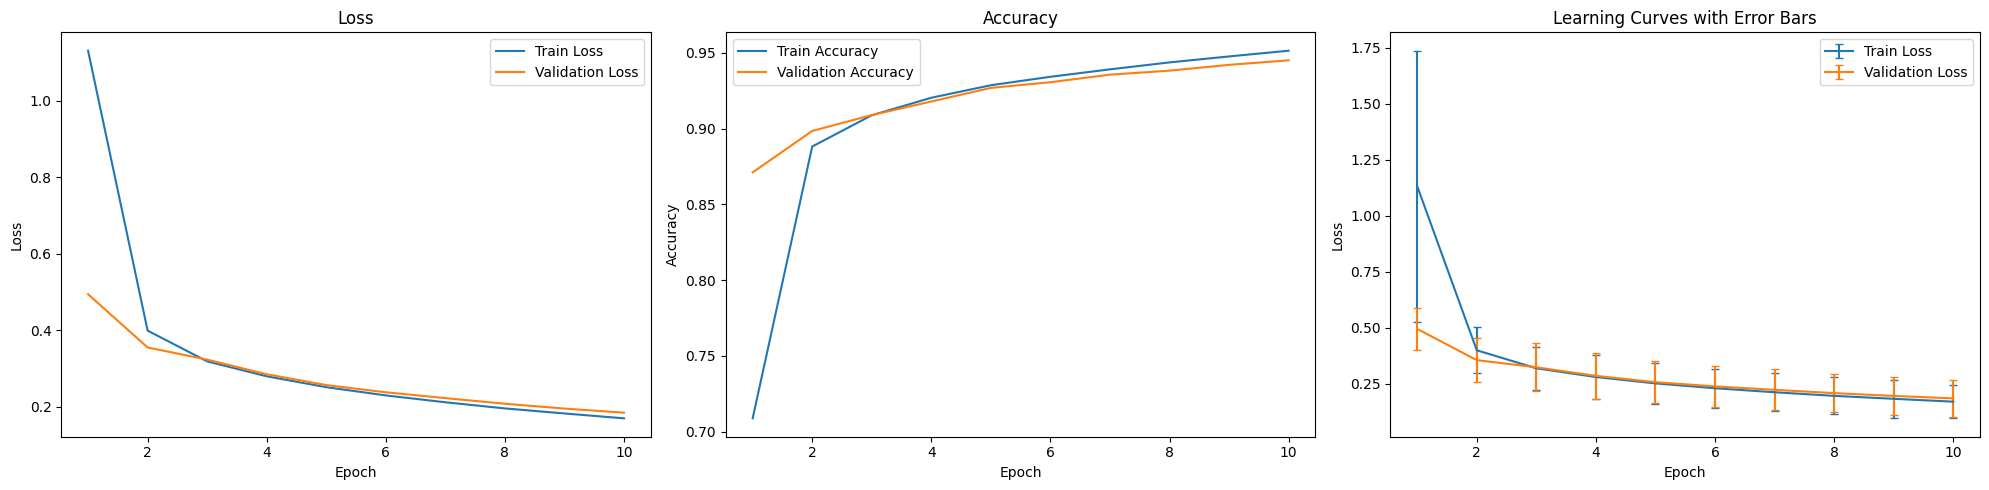

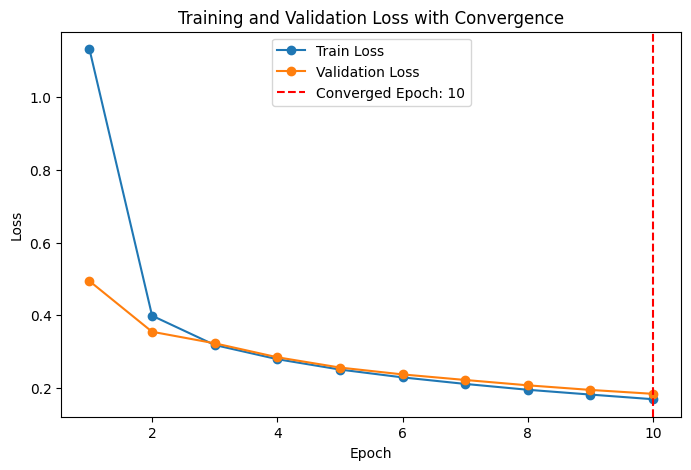

Training with learning rate: 0.1
Epoch 1/10 | Train Loss: 0.4282 | Train Acc: 87.08% | Val Loss: 0.2272 | Val Acc: 93.37%
New best model found (val_loss=0.2272)
Epoch 2/10 | Train Loss: 0.1638 | Train Acc: 95.14% | Val Loss: 0.2722 | Val Acc: 91.68%
No improvement. Patience: 1/3
Epoch 3/10 | Train Loss: 0.1142 | Train Acc: 96.56% | Val Loss: 0.1225 | Val Acc: 96.28%
New best model found (val_loss=0.1225)
Epoch 4/10 | Train Loss: 0.0841 | Train Acc: 97.41% | Val Loss: 0.1110 | Val Acc: 96.48%
New best model found (val_loss=0.1110)
Epoch 5/10 | Train Loss: 0.0636 | Train Acc: 98.10% | Val Loss: 0.1109 | Val Acc: 96.60%
No improvement. Patience: 1/3
Epoch 6/10 | Train Loss: 0.0498 | Train Acc: 98.51% | Val Loss: 0.0914 | Val Acc: 97.01%
New best model found (val_loss=0.0914)
Epoch 7/10 | Train Loss: 0.0381 | Train Acc: 98.87% | Val Loss: 0.0837 | Val Acc: 97.53%
New best model found (val_loss=0.0837)
Epoch 8/10 | Train Loss: 0.0297 | Train Acc: 99.12% | Val Loss: 0.0961 | Val Acc: 97.09%


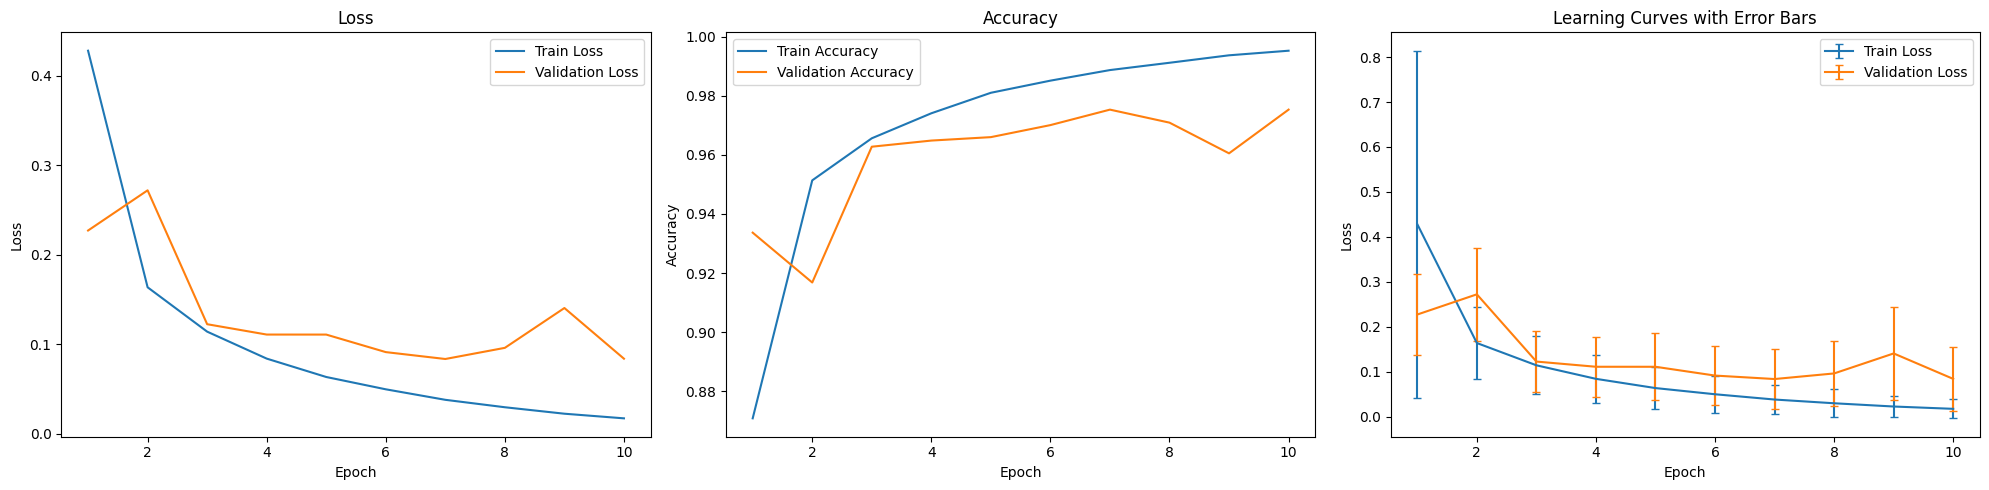

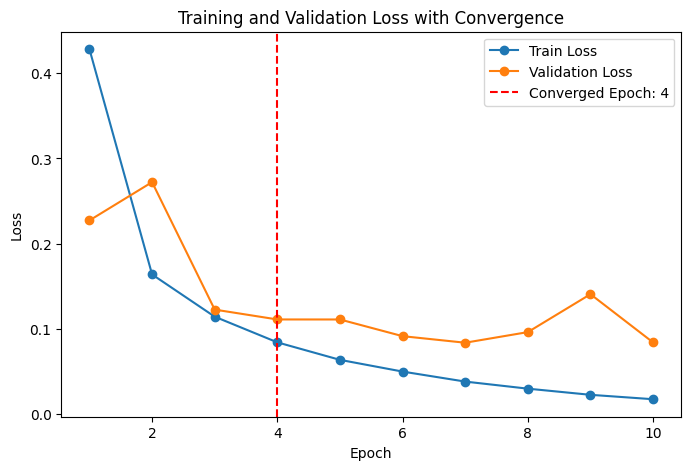

Training with learning rate: 1.0
Epoch 1/10 | Train Loss: 1.3016 | Train Acc: 53.82% | Val Loss: 0.4339 | Val Acc: 88.56%
New best model found (val_loss=0.4339)
Epoch 2/10 | Train Loss: 0.3327 | Train Acc: 90.84% | Val Loss: 0.4837 | Val Acc: 86.39%
No improvement. Patience: 1/3
Epoch 3/10 | Train Loss: 0.2270 | Train Acc: 93.75% | Val Loss: 0.2703 | Val Acc: 92.34%
New best model found (val_loss=0.2703)
Epoch 4/10 | Train Loss: 0.1800 | Train Acc: 94.93% | Val Loss: 0.2225 | Val Acc: 94.03%
New best model found (val_loss=0.2225)
Epoch 5/10 | Train Loss: 0.1506 | Train Acc: 95.86% | Val Loss: 0.1629 | Val Acc: 95.70%
New best model found (val_loss=0.1629)
Epoch 6/10 | Train Loss: 0.1314 | Train Acc: 96.33% | Val Loss: 0.2209 | Val Acc: 93.55%
No improvement. Patience: 1/3
Epoch 7/10 | Train Loss: 0.1172 | Train Acc: 96.74% | Val Loss: 0.4868 | Val Acc: 89.58%
No improvement. Patience: 2/3
Epoch 8/10 | Train Loss: 0.1087 | Train Acc: 96.91% | Val Loss: 0.1670 | Val Acc: 95.64%
No improv

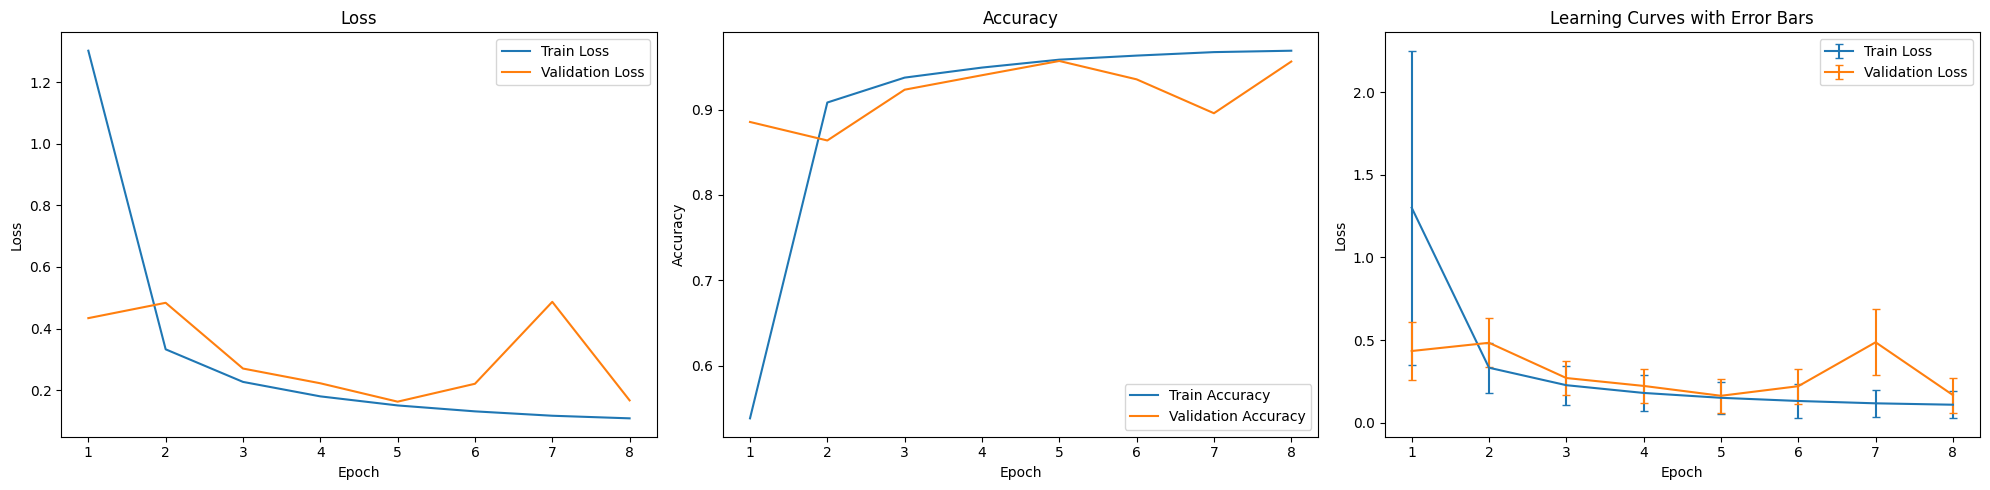

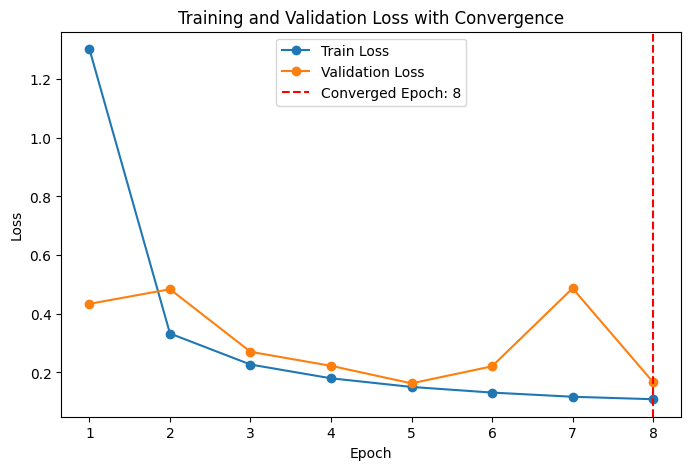

LR 0.001 → Final Val Acc: 87.32%
LR 0.01  → Final Val Acc: 94.51%
LR 0.1   → Final Val Acc: 97.53%
LR 1.0   → Final Val Acc: 95.64%

Best Learning Rate: 0.1 with Val Acc = 97.53%


In [73]:
# Test values : [0.001, 0.01, 0.1, 1.0]
learning_rates = [0.001, 0.01, 0.1, 1.0]
##epochs = 5

results_lr = {}
for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    model = NNModel().to(device)
    model.apply(model._init_weights)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    result = train_model_nn(model, train_loader, val_loader, criterion, optimizer, epochs=epochs, device=device)
    results_lr[lr] = result
    plot_training_curves(result)
    conv_epoch = detect_convergence(result["val_loss_mean"])
    plot_convergence(result["train_loss_mean"], result["val_loss_mean"], conv_epoch)

# best lr 
best_lr = None
best_acc = 0.0

for lr, history in results_lr.items():
    val_acc = history["val_acc_mean"][-1]
    print(f"LR {lr:<5} → Final Val Acc: {val_acc*100:.2f}%")
    if val_acc > best_acc:
        best_acc = val_acc
        best_lr = lr

print(f"\nBest Learning Rate: {best_lr} with Val Acc = {best_acc*100:.2f}%")


### 2. Batch Size Analysis


Epoch 1/10 | Train Loss: 1.1760 | Train Acc: 69.07% | Val Loss: 0.5022 | Val Acc: 86.91%
New best model found (val_loss=0.5022)
Epoch 2/10 | Train Loss: 0.4017 | Train Acc: 88.75% | Val Loss: 0.3614 | Val Acc: 89.99%
New best model found (val_loss=0.3614)
Epoch 3/10 | Train Loss: 0.3184 | Train Acc: 90.92% | Val Loss: 0.3133 | Val Acc: 91.14%
New best model found (val_loss=0.3133)
Epoch 4/10 | Train Loss: 0.2786 | Train Acc: 92.00% | Val Loss: 0.2789 | Val Acc: 92.26%
New best model found (val_loss=0.2789)
Epoch 5/10 | Train Loss: 0.2503 | Train Acc: 92.75% | Val Loss: 0.2544 | Val Acc: 92.72%
New best model found (val_loss=0.2544)
Epoch 6/10 | Train Loss: 0.2294 | Train Acc: 93.47% | Val Loss: 0.2389 | Val Acc: 93.13%
New best model found (val_loss=0.2389)
Epoch 7/10 | Train Loss: 0.2120 | Train Acc: 93.90% | Val Loss: 0.2226 | Val Acc: 93.63%
New best model found (val_loss=0.2226)
Epoch 8/10 | Train Loss: 0.1967 | Train Acc: 94.36% | Val Loss: 0.2115 | Val Acc: 93.88%
New best model 

,Batch Size,Val Accuracy (%),Train Time (s),Gradient Noise
0,16,96.758333,67.161692,4.090003
1,32,96.150000,56.476012,3.285586
2,64,94.124003,49.478691,3.057373
3,128,92.821919,47.226113,2.399373


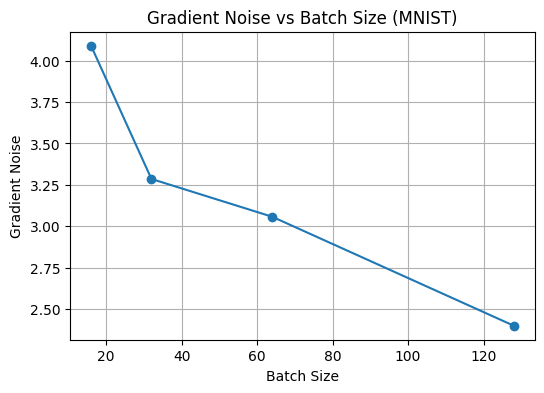


Best Batch Size: 16 with Val Acc = 96.76%


In [74]:
# get the full-batch sample and calculating gradient

full_batch_images, full_batch_labels = next(iter(train_loader))
full_batch_images, full_batch_labels = full_batch_images.to(device), full_batch_labels.to(device)

model = NNModel().to(device)
model.apply(model._init_weights)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)    
full_result = train_model_nn(model, train_loader, val_loader, criterion, optimizer, epochs=epochs, device=device)

full_batch_gradients = get_gradients(model, criterion, full_batch_images, full_batch_labels)

# Test Values : [16, 32, 64, 128]
batch_sizes = [16, 32, 64, 128]
##epochs = 5
results_bs = {} 
grad_noise_results = []

for bs in batch_sizes:  
    print(f"Training with batch size: {bs}")
    train_loader_bs, val_loader_bs, test_loader_bs = preprocess_mnist(batch_size=bs, augment=False, flatten=True)
   
    # model, loss, optimizer
    model = NNModel().to(device)
    model.apply(model._init_weights)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    
    start_time = time.time()
    result = train_model_nn(model, train_loader_bs, val_loader_bs, criterion, optimizer, epochs=epochs, device=device)
    train_time = time.time() - start_time
    results_bs[bs] = result

    final_val_acc = result["val_acc_mean"][-1]
 
    print(f"----- Final Val Acc: {final_val_acc*100:.2f}% | Train Time: {train_time:.2f}s -----")


    # Random stochastic batch
    batch_inputs, batch_targets = next(iter(DataLoader(train_loader_bs.dataset, batch_size=bs, shuffle=True)))
    batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)
    
    stoch_grads = get_gradients(model, criterion, batch_inputs.view(batch_inputs.size(0), -1), batch_targets)
    
    # Gradient noise 
    grad_noise = [sg - tg for sg, tg in zip(stoch_grads, full_batch_gradients)]
    noise_norm = torch.sqrt(sum([g.pow(2).sum() for g in grad_noise])).item()
    
    grad_noise_results.append((bs, final_val_acc * 100, train_time, noise_norm))
    print(f"----- Gradient Noise : {noise_norm:.6f} -----")


summary_df = pd.DataFrame(grad_noise_results, columns=["Batch Size", "Val Accuracy (%)", "Train Time (s)", "Gradient Noise"])
display(summary_df)

 
# best batch size
best_bs = None
best_acc = 0.0  
for bs, history in results_bs.items():
    val_acc = history["val_acc_mean"][-1]
    if val_acc > best_acc:
        best_acc = val_acc
        best_bs = bs


#  visualization
plt.figure(figsize=(6,4))
plt.plot(summary_df["Batch Size"], summary_df["Gradient Noise"], marker='o')
plt.title("Gradient Noise vs Batch Size (MNIST)")
plt.xlabel("Batch Size")
plt.ylabel("Gradient Noise")
plt.grid(True)
plt.show()

print(f"\nBest Batch Size: {best_bs} with Val Acc = {best_acc*100:.2f}%")


Batch size & Gradient Noise are inversely proportioned.
As the batch size increases, the noise of gradient estimates decreases, which leads to a smoother curves and more stable convergence.


### 3. Architecture Analysis

In [75]:
layers = [2, 3, 4, 5]
neurons_per_layer = [64, 128, 256, 512]
##epochs = 2
results_arch = {}

for num_layers in layers:
    for neurons in neurons_per_layer:
        print(f"Training with {num_layers} layers and {neurons} neurons per layer")

        model = NNModel(hidden_sizes=[neurons]*num_layers).to(device)
        model.apply(model._init_weights)
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
        
        result = train_model_nn(model, train_loader, val_loader, criterion, optimizer, epochs=epochs, device=device)
      
        results_arch[(num_layers, neurons)] = result

arch_df = pd.DataFrame(
    [(num_layers, neurons, res["val_acc_mean"][-1] * 100,) 
     for (num_layers, neurons), res in results_arch.items()],
    columns=["Num Layers", "Neurons per Layer", "Val Accuracy (%)"]
)
display(arch_df)            

best_row = arch_df.loc[arch_df["Val Accuracy (%)"].idxmax()]
print(f"\nBest Architecture: {int(best_row['Num Layers'])} layers × {int(best_row['Neurons per Layer'])} neurons")
print(f"Validation Accuracy: {best_row['Val Accuracy (%)']:.2f}%")

Training with 2 layers and 64 neurons per layer
Epoch 1/10 | Train Loss: 1.1757 | Train Acc: 69.21% | Val Loss: 0.5737 | Val Acc: 85.33%
New best model found (val_loss=0.5737)
Epoch 2/10 | Train Loss: 0.4667 | Train Acc: 87.36% | Val Loss: 0.4133 | Val Acc: 88.54%
New best model found (val_loss=0.4133)
Epoch 3/10 | Train Loss: 0.3728 | Train Acc: 89.39% | Val Loss: 0.3591 | Val Acc: 89.94%
New best model found (val_loss=0.3591)
Epoch 4/10 | Train Loss: 0.3310 | Train Acc: 90.36% | Val Loss: 0.3313 | Val Acc: 90.66%
New best model found (val_loss=0.3313)
Epoch 5/10 | Train Loss: 0.3052 | Train Acc: 91.16% | Val Loss: 0.3076 | Val Acc: 91.17%
New best model found (val_loss=0.3076)
Epoch 6/10 | Train Loss: 0.2845 | Train Acc: 91.80% | Val Loss: 0.2914 | Val Acc: 91.63%
New best model found (val_loss=0.2914)
Epoch 7/10 | Train Loss: 0.2690 | Train Acc: 92.30% | Val Loss: 0.2761 | Val Acc: 92.18%
New best model found (val_loss=0.2761)
Epoch 8/10 | Train Loss: 0.2554 | Train Acc: 92.67% | Va

,Num Layers,Neurons per Layer,Val Accuracy (%)
0,2,64,93.085106
1,2,128,93.168218
2,2,256,93.650266
3,2,512,93.999335
4,3,64,93.592088
5,3,128,94.290226
6,3,256,94.406582
7,3,512,94.672540
8,4,64,93.159907
9,4,128,94.132314



Best Architecture: 5 layers × 512 neurons
Validation Accuracy: 95.44%


## Best NN Model

In [76]:
# Best Architecture Model Training

# Best lr , Best bs , Best architecture
num_layers = int(best_row["Num Layers"])
neurons = int(best_row["Neurons per Layer"])
hidden_sizes = [neurons] * num_layers

train_loader_best, val_loader_best, test_loader_best = preprocess_mnist(batch_size=best_bs, augment=False, flatten=True)

best_model = NNModel(hidden_sizes=hidden_sizes).to(device)
best_model.apply(best_model._init_weights)
best_criterion = nn.CrossEntropyLoss()
best_optimizer = torch.optim.SGD(best_model.parameters(), lr=best_lr)

print(f"Best NN model: {num_layers} layers × {neurons} neurons, lr={best_lr}, batch_size={best_bs}")


Best NN model: 5 layers × 512 neurons, lr=0.1, batch_size=16


### Training the best NN Model


In [77]:
# train best_model
train_time_start = time.time()
train_model_nn(best_model, train_loader_best, val_loader_best, best_criterion, best_optimizer, epochs=epochs, device=device)
train_time_end = time.time()    
train_time_best_nn = train_time_end - train_time_start
print(f"Training time for Best NN Model: {train_time_best_nn:.2f} seconds with accuracy {best_acc*100:.2f}%") 

Epoch 1/10 | Train Loss: 0.3126 | Train Acc: 90.37% | Val Loss: 0.1311 | Val Acc: 95.93%
New best model found (val_loss=0.1311)
Epoch 2/10 | Train Loss: 0.1211 | Train Acc: 96.39% | Val Loss: 0.1301 | Val Acc: 96.12%
New best model found (val_loss=0.1301)
Epoch 3/10 | Train Loss: 0.0832 | Train Acc: 97.51% | Val Loss: 0.1960 | Val Acc: 94.46%
No improvement. Patience: 1/3
Epoch 4/10 | Train Loss: 0.0615 | Train Acc: 98.03% | Val Loss: 0.0979 | Val Acc: 97.39%
New best model found (val_loss=0.0979)
Epoch 5/10 | Train Loss: 0.0468 | Train Acc: 98.56% | Val Loss: 0.1031 | Val Acc: 97.36%
No improvement. Patience: 1/3
Epoch 6/10 | Train Loss: 0.0356 | Train Acc: 98.92% | Val Loss: 0.1071 | Val Acc: 97.16%
No improvement. Patience: 2/3
Epoch 7/10 | Train Loss: 0.0300 | Train Acc: 99.06% | Val Loss: 0.0973 | Val Acc: 97.49%
No improvement. Patience: 3/3
Early stopping triggered!
Training time for Best NN Model: 96.45 seconds with accuracy 96.76%


## Model Comparision


,Model,Accuracy (%),Training Time (s)
0,Logistic Regression,99.84,1.40
1,Softmax Regression,89.28,43.34
2,Neural Network,96.76,96.45


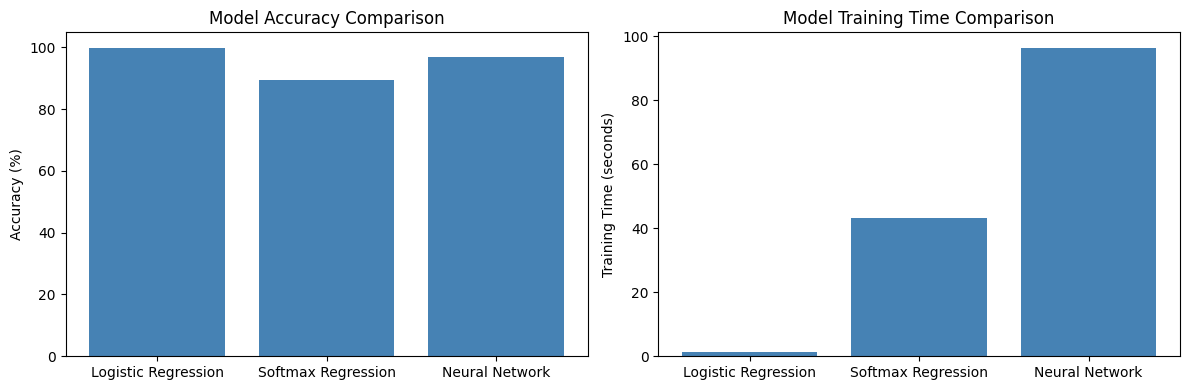

In [78]:
# Create summary DataFrame
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Softmax Regression", "Neural Network"],
    "Accuracy (%)": [acc_logistic * 100, acc_softmax * 100, best_acc * 100],
    "Training Time (s)": [training_time_logistic, training_time_softmax, train_time_best_nn]
})

# Round for neat display
results_df["Accuracy (%)"] = results_df["Accuracy (%)"].round(2)
results_df["Training Time (s)"] = results_df["Training Time (s)"].round(2)

# Display
display(results_df)

# Bar plots
fig, ax1 = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
ax1[0].bar(results_df["Model"], results_df["Accuracy (%)"], color="steelblue")
ax1[0].set_title("Model Accuracy Comparison")
ax1[0].set_ylabel("Accuracy (%)")

# Time plot
ax1[1].bar(results_df["Model"], results_df["Training Time (s)"], color="steelblue")
ax1[1].set_title("Model Training Time Comparison")
ax1[1].set_ylabel("Training Time (seconds)")

plt.tight_layout()
plt.show()


##### **Computational Complexity & Training Time**
- **Logistic Regression:** Fastest and simplest model. It trains quickly since it only involves one linear layer.  
- **Softmax Regression:** Slightly heavier than logistic, but still efficient and quick to converge.  
- **Neural Network:** Most computationally complex as deeper layers and more parameters make training slower but more powerful.



##### **When to Use Each**
- **Logistic Regression:** Best for simple, linearly separable problems or when speed and interpretability matter most.  
- **Softmax Regression:** Great for multi-class problems with mostly linear relationships.  
- **Neural Network:** Ideal for complex, non-linear data like images , use it when accuracy is more important than speed.



## Best Model Evaluation

Best NN Model Test Accuracy: 97.517%


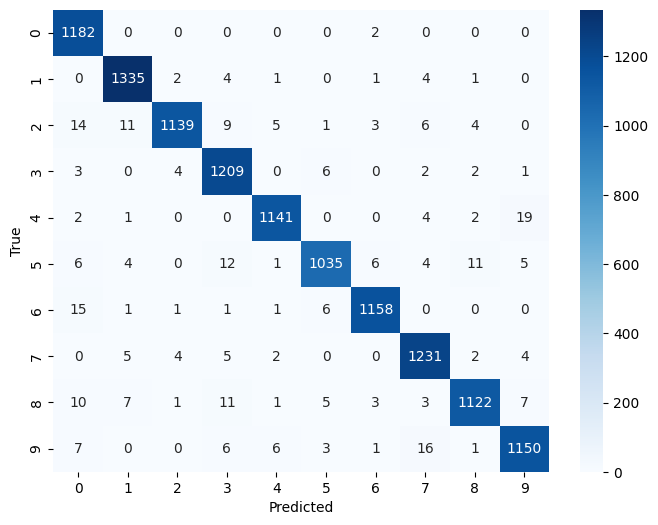

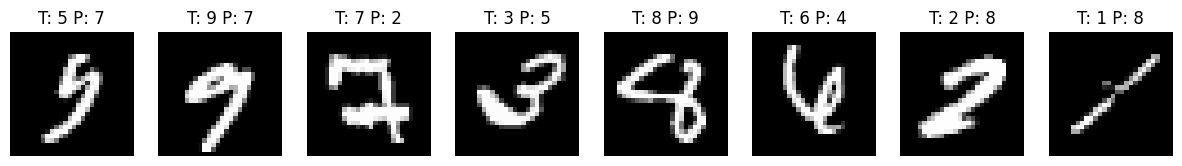

In [79]:
# test best nn model
best_nn_acc, cm = test_model(best_model, test_loader_best, device)
print(f"Best NN Model Test Accuracy: {best_nn_acc*100:.3f}%")
print_confusion_matrix(cm, classes=[str(i) for i in range(10)])

# Analysis of misclassifications
misclassified_indices = []
for images, labels in test_loader_best:
    images, labels = images.to(device), labels.to(device)
    outputs = best_model(images)
    _, predicted = torch.max(outputs, 1)
    for i in range(len(labels)):
        if predicted[i] != labels[i]:
            misclassified_indices.append((images[i].cpu(), labels[i].cpu(), predicted[i].cpu()))

# Display some misclassified samples
num_to_display = 8
fig, axes = plt.subplots(1, num_to_display, figsize=(15, 3))
for i in range(num_to_display): 
    if i < len(misclassified_indices):
        img, true_label, pred_label = misclassified_indices[i]
        axes[i].imshow(img.view(28, 28), cmap='gray')
        axes[i].set_title(f"T: {true_label.item()} P: {pred_label.item()}")
        axes[i].axis('off')            

plt.show()

# CNN


In [80]:
model_cnn = CNNModel(num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()   
optimizer = torch.optim.SGD(model_cnn.parameters(), lr=0.01)

train_loader, val_loader, test_loader = preprocess_mnist(batch_size=64, augment=True, flatten=False)
##epochs = 50

history_cnn = train_model_cnn(
    model=model_cnn,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    epochs=epochs,
    device=device
)

Epoch [1/10] | Train Loss: 2.2952 | Train Acc: 16.01% | Val Loss: 2.2831 | Val Acc: 34.62%
New best model found (val_loss=2.2831)
Epoch [2/10] | Train Loss: 2.1556 | Train Acc: 34.27% | Val Loss: 1.4939 | Val Acc: 59.67%
New best model found (val_loss=1.4939)
Epoch [3/10] | Train Loss: 0.8905 | Train Acc: 71.80% | Val Loss: 0.4428 | Val Acc: 85.72%
New best model found (val_loss=0.4428)
Epoch [4/10] | Train Loss: 0.4375 | Train Acc: 86.60% | Val Loss: 0.2498 | Val Acc: 92.58%
New best model found (val_loss=0.2498)
Epoch [5/10] | Train Loss: 0.3079 | Train Acc: 90.63% | Val Loss: 0.1877 | Val Acc: 94.22%
New best model found (val_loss=0.1877)
Epoch [6/10] | Train Loss: 0.2499 | Train Acc: 92.40% | Val Loss: 0.1668 | Val Acc: 94.81%
New best model found (val_loss=0.1668)
Epoch [7/10] | Train Loss: 0.2176 | Train Acc: 93.55% | Val Loss: 0.1216 | Val Acc: 96.19%
New best model found (val_loss=0.1216)
Epoch [8/10] | Train Loss: 0.1963 | Train Acc: 94.24% | Val Loss: 0.1129 | Val Acc: 96.42%

## CNN Evaluation 

In [81]:
model_cnn.eval()
correct = 0 
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_cnn(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
acc_cnn = 100 * correct / total
print(f'Test Accuracy: {acc_cnn:.2f}%')

Test Accuracy: 96.85%


## CNN vs Fully-connected Network

In [82]:
# performance comparison
models = ['Best NN Model', 'CNN Model']
accuracies = [best_nn_acc * 100, acc_cnn]

#summary table
summary_df = pd.DataFrame({
    "Model": models,
    "Accuracy (%)": accuracies
})

display(summary_df) 


,Model,Accuracy (%)
0,Best NN Model,97.516667
1,CNN Model,96.850000


CNNs learn spatial features, meaning patterns based on the arrangement of pixels. Convolutional layers detect local patterns (edges, corners), build hierarchical features (shapes → objects), and preserve spatial structure. This allows CNNs to recognize objects more efficiently than fully connected networks, which flatten images and lose spatial information. Pooling adds robustness to position changes.

## Dropout Analysis

In [83]:
# drouptout values [0.1, 0.3, 0.5, 0.7]
dropout_values = [0.1, 0.3, 0.5, 0.7]
results_dropout = {}
for dropout in dropout_values:
    print(f"Training CNN with dropout: {dropout}")
    model_cnn_dropout = CNNModel(num_classes=10, dropout_rate=dropout).to(device)
    criterion = nn.CrossEntropyLoss()   
    optimizer = torch.optim.SGD(model_cnn_dropout.parameters(), lr=0.01)

    train_model_cnn(
        model=model_cnn_dropout,
        train_loader=train_loader,
        val_loader=val_loader,
        criterion=criterion,
        optimizer=optimizer,
        epochs=epochs,
        device=device
    )

    model_cnn_dropout.eval()
    correct = 0 
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_cnn_dropout(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
    acc_dropout = 100 * correct / total
    results_dropout[dropout] = acc_dropout
    print(f'Test Accuracy with dropout {dropout}: {acc_dropout:.2f}%\n')

# dropout results table
dropout_df = pd.DataFrame(
    list(results_dropout.items()), 
    columns=["Dropout Rate", "Test Accuracy (%)"]
)   
display(dropout_df)

# best dropout
best_dropout = max(results_dropout, key=results_dropout.get)
print(f"Best Dropout Rate: {best_dropout} with Test Accuracy: {results_dropout[best_dropout]:.2f}%")    

Training CNN with dropout: 0.1
Epoch [1/10] | Train Loss: 2.2988 | Train Acc: 12.68% | Val Loss: 2.2934 | Val Acc: 11.24%
New best model found (val_loss=2.2934)
Epoch [2/10] | Train Loss: 2.2810 | Train Acc: 23.48% | Val Loss: 2.2490 | Val Acc: 39.78%
New best model found (val_loss=2.2490)
Epoch [3/10] | Train Loss: 1.7644 | Train Acc: 46.76% | Val Loss: 0.7915 | Val Acc: 75.52%
New best model found (val_loss=0.7915)
Epoch [4/10] | Train Loss: 0.6513 | Train Acc: 79.56% | Val Loss: 0.3738 | Val Acc: 88.58%
New best model found (val_loss=0.3738)
Epoch [5/10] | Train Loss: 0.3985 | Train Acc: 87.90% | Val Loss: 0.2247 | Val Acc: 92.87%
New best model found (val_loss=0.2247)
Epoch [6/10] | Train Loss: 0.3028 | Train Acc: 90.97% | Val Loss: 0.1685 | Val Acc: 94.77%
New best model found (val_loss=0.1685)
Epoch [7/10] | Train Loss: 0.2482 | Train Acc: 92.57% | Val Loss: 0.1457 | Val Acc: 95.38%
New best model found (val_loss=0.1457)
Epoch [8/10] | Train Loss: 0.2162 | Train Acc: 93.36% | Val

,Dropout Rate,Test Accuracy (%)
0,0.1,96.300000
1,0.3,96.741667
2,0.5,96.800000
3,0.7,96.825000


Best Dropout Rate: 0.7 with Test Accuracy: 96.83%



Dropout was used to reduce overfitting by randomly deactivating neurons during training.  
Different dropout rates (0.1, 0.3, 0.5, 0.7) were tested using the same CNN architecture and parameters.

Low dropout (0.1) showed mild regularization but still some overfitting.  
Moderate dropout (0.3–0.5) provided the best balance between training and validation performance, reducing overfitting while maintaining good accuracy.  
A high dropout rate (0.7) led to underfitting, as the model struggled to learn complex features.

So, Moderate dropout values (around 0.3–0.5) improve generalization and prevent overfitting without significantly harming accuracy.


## Batch Normalization

In [84]:
model_cnn_bn = CNNModel(num_classes=10, dropout_rate=0.5, use_batch_norm=True).to(device)

criterion = nn.CrossEntropyLoss()
optimizer_bn = torch.optim.SGD(model_cnn_bn.parameters(), lr=0.01, momentum=0.9)

# Train the model with BatchNorm
history_cnn_bn = train_model_cnn(
    model=model_cnn_bn,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer_bn,
    epochs=epochs,
    device=device
)

Epoch [1/10] | Train Loss: 0.2279 | Train Acc: 93.75% | Val Loss: 0.0574 | Val Acc: 98.15%
New best model found (val_loss=0.0574)
Epoch [2/10] | Train Loss: 0.0874 | Train Acc: 97.51% | Val Loss: 0.0662 | Val Acc: 97.94%
No improvement. Patience: 1/3
Epoch [3/10] | Train Loss: 0.0671 | Train Acc: 98.04% | Val Loss: 0.0357 | Val Acc: 98.92%
New best model found (val_loss=0.0357)
Epoch [4/10] | Train Loss: 0.0582 | Train Acc: 98.27% | Val Loss: 0.0289 | Val Acc: 99.22%
New best model found (val_loss=0.0289)
Epoch [5/10] | Train Loss: 0.0503 | Train Acc: 98.53% | Val Loss: 0.0311 | Val Acc: 99.03%
No improvement. Patience: 1/3
Epoch [6/10] | Train Loss: 0.0469 | Train Acc: 98.62% | Val Loss: 0.0267 | Val Acc: 99.17%
New best model found (val_loss=0.0267)
Epoch [7/10] | Train Loss: 0.0418 | Train Acc: 98.71% | Val Loss: 0.0256 | Val Acc: 99.22%
New best model found (val_loss=0.0256)
Epoch [8/10] | Train Loss: 0.0400 | Train Acc: 98.75% | Val Loss: 0.0256 | Val Acc: 99.26%
No improvement. P

## Train Model with Batch normalization


In [85]:
model_cnn_bn.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_cnn_bn(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

acc_cnn_bn = 100 * correct / total
print(f'Test Accuracy with BatchNorm: {acc_cnn_bn:.2f}%')

Test Accuracy with BatchNorm: 99.12%


## Effect of Batch Normalization on Convergence Speed 

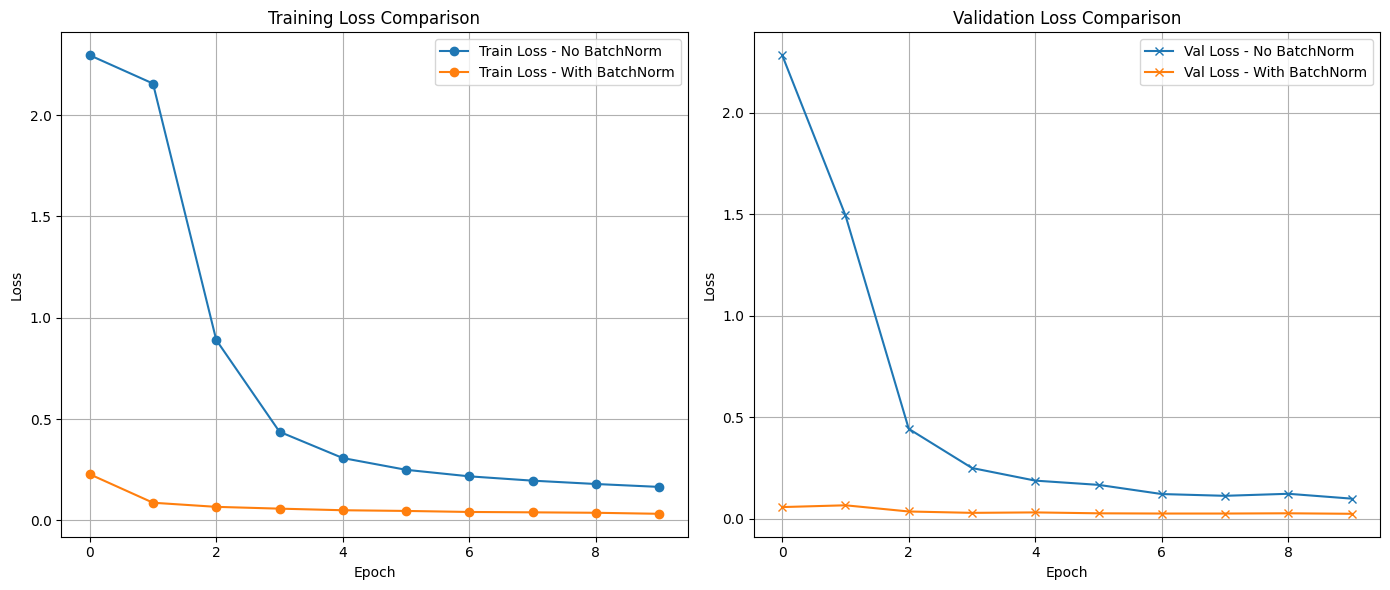

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
# Train
axes[0].plot(history_cnn['train_loss'], label='Train Loss - No BatchNorm', marker='o')
axes[0].plot(history_cnn_bn['train_loss'], label='Train Loss - With BatchNorm', marker='o')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training Loss Comparison')
axes[0].legend()
axes[0].grid(True)
# Val
axes[1].plot(history_cnn['val_loss'], label='Val Loss - No BatchNorm', marker='x')
axes[1].plot(history_cnn_bn['val_loss'], label='Val Loss - With BatchNorm', marker='x')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_title('Validation Loss Comparison')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

Batch normalization helps the network train more smoothly and faster by keeping layer inputs stable.  

Dropout prevents overfitting by randomly turning off some neurons during training.  

When used together:  
- Training is more stable with fewer sudden changes in loss.  
- The model converges faster to a lower loss.  
- Generalization improves, meaning better performance on validation data.  

In short, batch normalization speeds up and stabilizes training, and dropout helps the model not overfit.
